# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [1]:
import pandas as pd 

In [2]:
df_flights = pd.read_csv('flights.csv')

df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

## Let's check for missing values

In [3]:
df_flights.info()
df_flights.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           269179 non-null  float64
 16  CR

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

That feature says that when a flight is delayed more than 15 minutes then is late, so let's check if that happen with those flights

In [4]:
df_flights.DepDelay[df_flights.DepDel15.isnull()]

171       0
359       0
429       0
545       0
554       0
         ..
271410    0
271607    0
271634    0
271671    0
271885    0
Name: DepDelay, Length: 2761, dtype: int64

We can see that there is no delay in those flights, let's check the mean of that column for those indexes.

In [5]:
df_flights.DepDelay[df_flights.DepDel15.isnull()].describe()

count    2761.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: DepDelay, dtype: float64

So, we can change the null values to 0, this because those flights were not late.

In [6]:
df_flights.DepDel15 = df_flights.DepDel15.fillna(0)
# And check them
df_flights.isnull().sum()


Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

## Clean outliers
Here I want to see if many values are out of range

Next function prints and plots the distribution with the central tendency measures, and a box plot of the data

In [7]:
# Create a function that we can re-use
def show_distribution(var_data, str1):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]
    print(f"{str1}")
    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (12,7))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle(f'Data Distribution ({str1})')

    # Show the figure
    #fig.show()

DepDelay
Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00

ArrDelay
Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



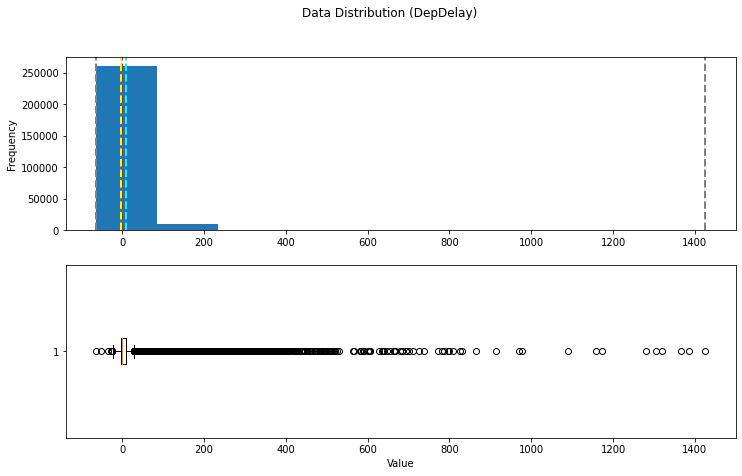

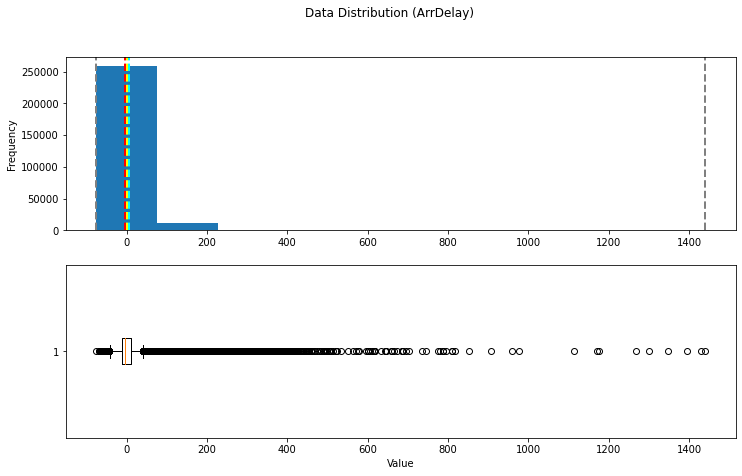

In [8]:
# Plotting the uncleaned distributions 

# Call the function for each delay field
delayFields = ['DepDelay','ArrDelay']
# View the revised distributions
for col in delayFields:
    show_distribution(df_flights[col], col)

For clean the outliers we are going to keep values below the 90% and above the 0.1%, so:

In [9]:
#### For the ArrDelay
q01 = df_flights.ArrDelay.quantile(0.01)
q02 = df_flights.ArrDelay.quantile(0.90)

df_flights = df_flights[df_flights.ArrDelay<q02]
df_flights = df_flights[df_flights.ArrDelay>q01]

#### For the DepDelay
q01 = df_flights.DepDelay.quantile(0.01)
q02 = df_flights.DepDelay.quantile(0.90)

df_flights = df_flights[df_flights.DepDelay<q02]
df_flights = df_flights[df_flights.DepDelay>q01]


## Exploring the cleaned data

DepDelay
Minimum:-11.00
Mean:-0.92
Median:-2.00
Mode:-3.00
Maximum:16.00

ArrDelay
Minimum:-32.00
Mean:-5.03
Median:-6.00
Mode:0.00
Maximum:37.00



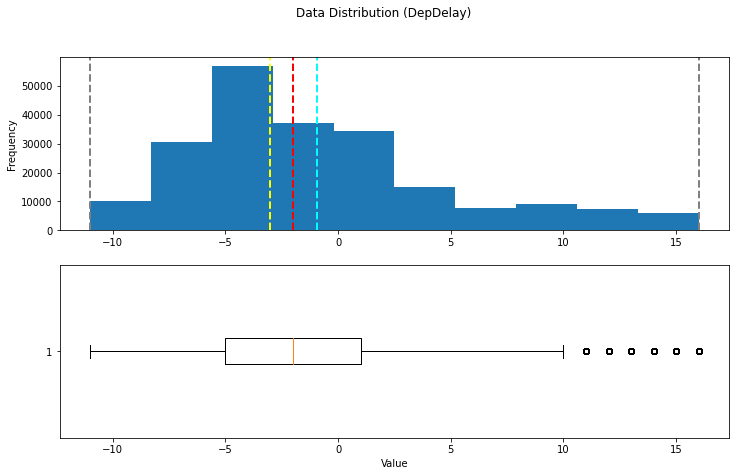

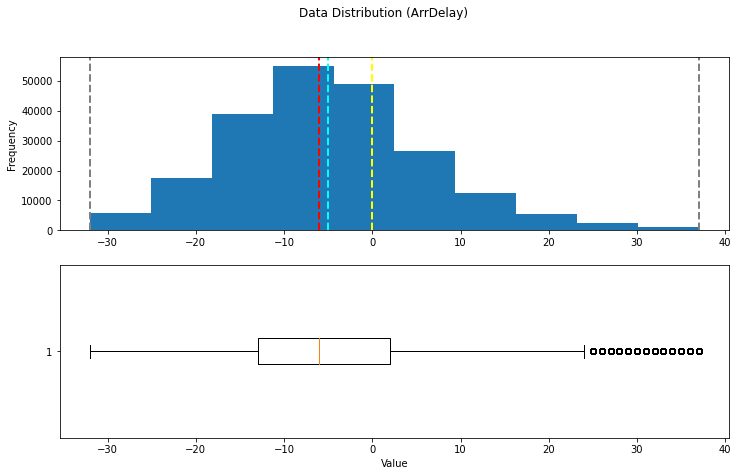

In [10]:
#printing the cleaned delay data

# Call the function for each delay field
delayFields = ['DepDelay','ArrDelay']
# View the revised distributions
for col in delayFields:
    show_distribution(df_flights[col], col)



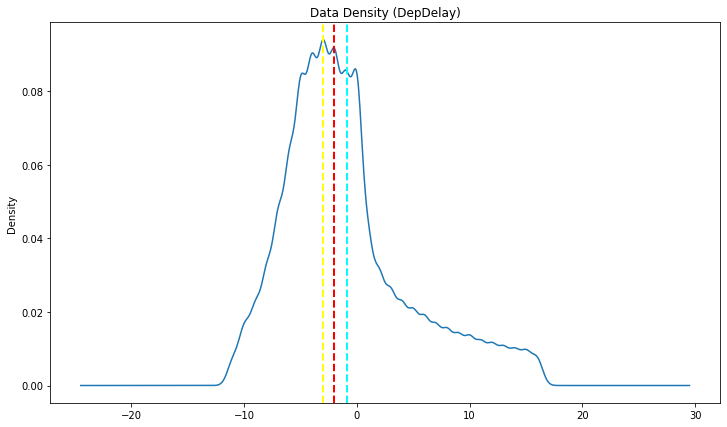

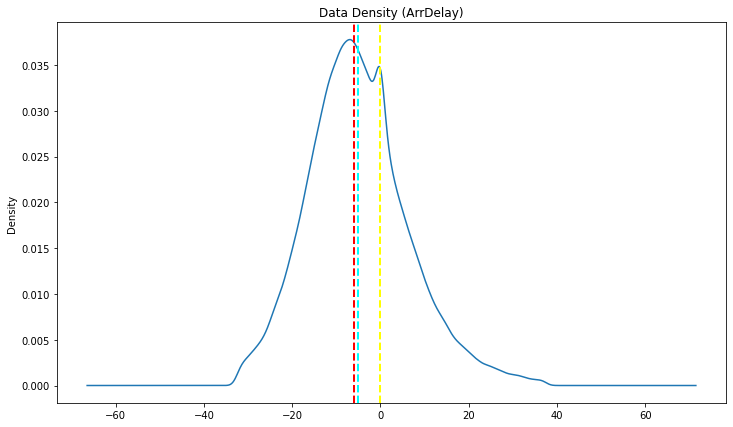

In [11]:
# This funtion plots the density of the data
def show_density(var_data, str1):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(12,7))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title(f'Data Density ({str1})')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density 

for col in delayFields:
    show_density(df_flights[col], col)

Seeing an overview 

In [12]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,214397.0,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000,214397.000000
mean,2013.0,7.018368,15.794703,3.902737,12757.827661,12726.276147,1278.223879,-0.921692,0.018116,1461.406596,-5.030276,0.068602,0.013228
std,0.0,2.006398,8.859118,1.997744,1510.058629,1506.251757,469.440262,5.708594,0.133371,485.676457,11.424280,0.252776,0.114249
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,850.000000,-5.000000,0.000000,1054.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1235.000000,-2.000000,0.000000,1445.000000,-6.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1655.000000,1.000000,0.000000,1845.000000,2.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,16.000000,1.000000,2359.000000,37.000000,1.000000,1.000000


Mean values for the delays

In [13]:
df_flights[delayFields].mean()

DepDelay   -0.921692
ArrDelay   -5.030276
dtype: float64

### How do the carriers compare in terms of arrival delay performance?

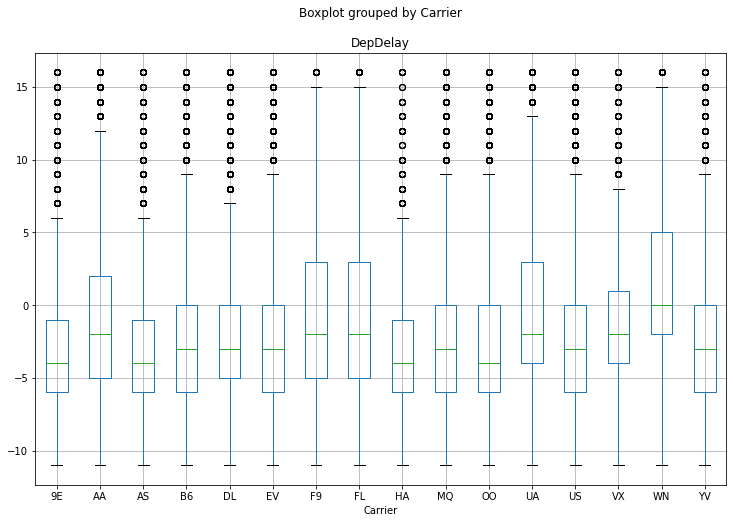

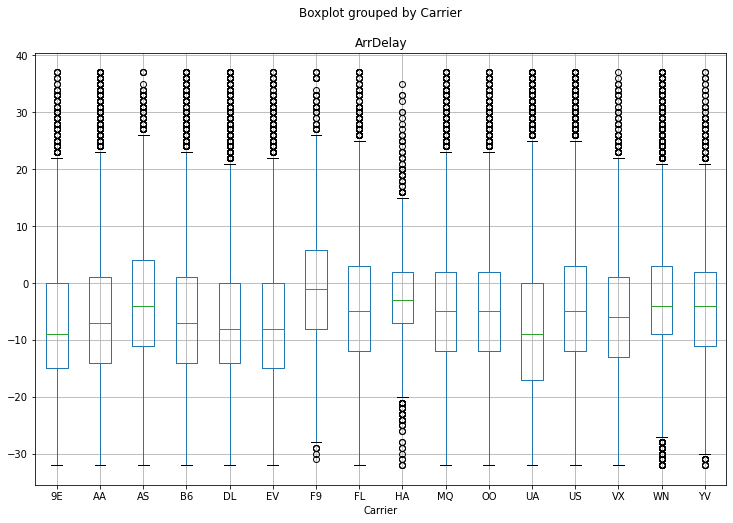

In [14]:
for col in delayFields:
    df_flights.boxplot(column=col, by='Carrier', figsize=(12,8))

### Is there a noticable difference in arrival delays for different days of the week?

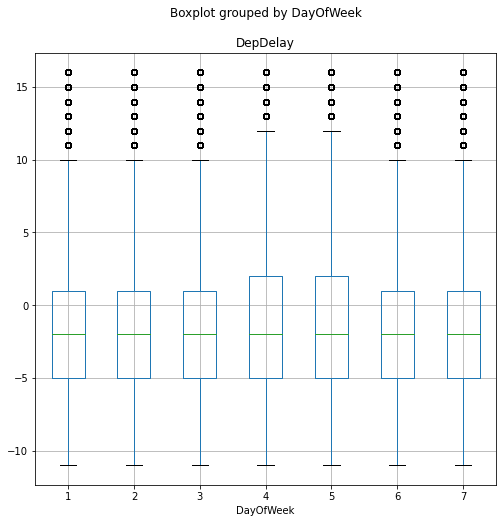

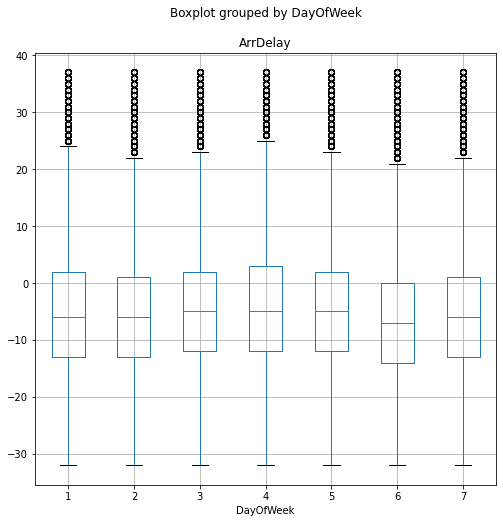

In [15]:
for col in delayFields:
    df_flights.boxplot(column=col, by='DayOfWeek', figsize=(8,8))

Here, we can see that on thursdays and fridays there is a slightly augment on delay, but nothing much greater that error. 

### Which departure airport has the highest average departure delay?

Let's group by the origin airports, calculate the mean of the DepDelay for each of them, then sort the data in descending way, and plot it.

<AxesSubplot:title={'center':'DepDelay means'}, xlabel='OriginAirportName'>

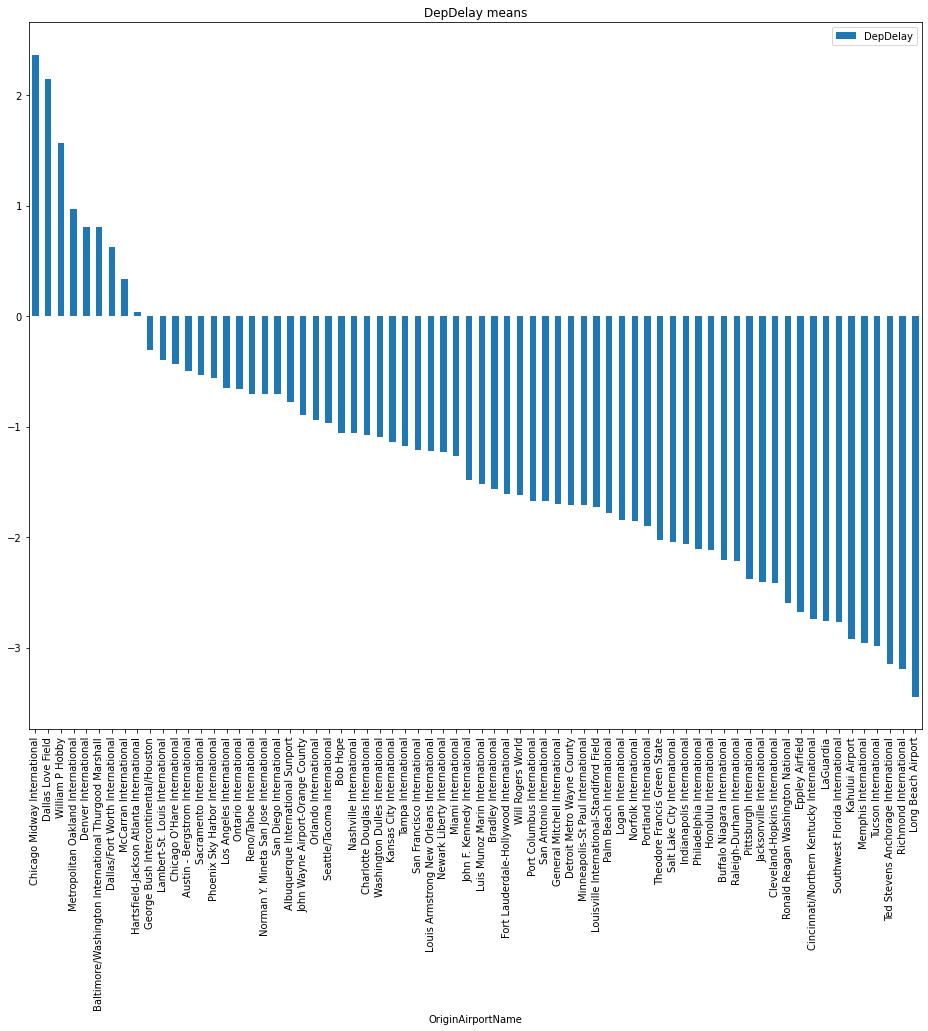

In [16]:
aeroport_group = df_flights.groupby(df_flights.OriginAirportName)

MeanDepDel = pd.DataFrame(
    aeroport_group.DepDelay.mean()).sort_values('DepDelay', ascending=False)
MeanDepDel
MeanDepDel.plot(kind='bar', figsize= (16,13), title = 'DepDelay means')

We can see that Chicago Midway International is the one with the largest mean DepDelay.

### Do late departures tend to result in longer arrival delays than on-time departures?

With some box plots we can see if the flight is delayed on departure, it will be also on arrival.

<AxesSubplot:title={'center':'ArrDelay'}, xlabel='DepDel15'>

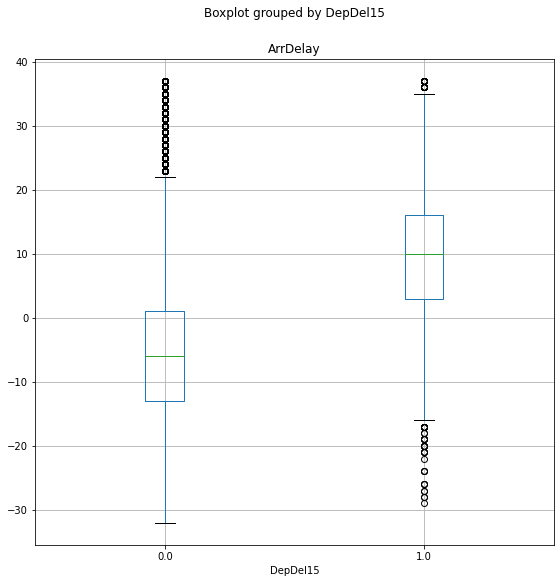

In [17]:
df_flights.boxplot(column='ArrDelay', by='DepDel15', figsize=(9,9))

As we could thing, it usually affects on arrivals, and we specifically can observe that de delay has a mean near to ten minutes. 

### Which route (from origin airport to destination airport) has the most late arrivals?
To get this information we use the pandas series methos to concat the origin airport to the destination one, adding a new column with the routes.

In [18]:
routes = pd.Series(df_flights['OriginAirportName'] + '>' + df_flights['DestAirportName'])
df_flights = pd.concat([df_flights, routes.rename('Route')], axis=1)
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,...,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled,Route
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,...,New York,NY,1539,4,0.0,1824,13,0,0,Tampa International>John F. Kennedy International
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,...,Chicago,IL,710,3,0.0,740,22,1,0,Pittsburgh International>Chicago Midway Intern...
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,...,Washington,DC,810,-3,0.0,1614,-7,0,0,Seattle/Tacoma International>Ronald Reagan Was...
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,...,Atlanta,GA,545,-1,0.0,728,-9,0,0,Norfolk International>Hartsfield-Jackson Atlan...
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,...,Houston,TX,630,-1,0.0,1210,-3,0,0,Metropolitan Oakland International>William P H...


Them we group the flights by the routes and calculate the total delayed flights (more than 15 minutes) for each of them.

In [19]:
route_group =  df_flights.groupby(df_flights.Route)
pd.DataFrame(route_group['ArrDel15'].sum()).sort_values('ArrDel15', ascending=False)

,ArrDel15
Route,
San Francisco International>Los Angeles International,90
Los Angeles International>San Francisco International,69
LaGuardia>Hartsfield-Jackson Atlanta International,68
Los Angeles International>John F. Kennedy International,52
LaGuardia>Charlotte Douglas International,51
...,...
Logan International>Austin - Bergstrom International,0
Logan International>Memphis International,0
Logan International>Port Columbus International,0


And the answer is San Francisco International to Los Angeles International, this is the route with the gratest delayed time for arrivals.

### Which route has the highest average arrival delay?
Using the above agroupations, we can calculate the averate arrival delay.

In [20]:
MeanArrDel = pd.DataFrame(
    route_group.ArrDelay.mean()).sort_values('ArrDelay', ascending=False)
MeanArrDel

,ArrDelay
Route,
Louis Armstrong New Orleans International>Ronald Reagan Washington National,24.500000
Cleveland-Hopkins International>Palm Beach International,18.000000
John F. Kennedy International>Louisville International-Standiford Field,18.000000
Cleveland-Hopkins International>Philadelphia International,12.800000
Memphis International>Denver International,9.758621
...,...
Lambert-St. Louis International>Cleveland-Hopkins International,-20.000000
Eppley Airfield>LaGuardia,-20.750000
Denver International>Kahului Airport,-22.666667


The answer is different this time, the route Louis Armstrong New Orleans International>Ronald Reagan Washington National is not the most delayed one but is more probable that if the flight is late, then the delay will be longer than on the other airports.	